# Obligatorisk innlevering 2 - oppgave 1

Denne oppgaven tar for seg et datasett fra Food Mart, som er ennærbutikkjede i USA. Food Mart har i dette datasettet samlet endel data i forbindelse med mediekampanjer. Din oppgave er å forutsi kostnadene for mediekampanjer i matvaremarkedet på grunnlag av funksjonene som tilbys.

In [3]:
# Importer resten av pakkene du trenger her:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett1.csv")
# Her deler jeg datasettet inn i egenskaper (X) og target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
# PS: Ikke endre denne kodecellen!

#### Oppgave 1.1) 
Visualiser $y\_train$ og $y\_test$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? 

Begrunn svaret

In [5]:
#TODO: visualiser y_train og y_test i et histogram

In [6]:
# X_tain => y_train
# X_test => y_test

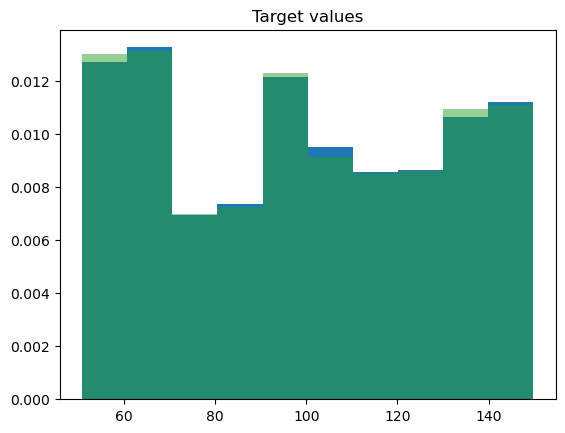

In [7]:
# Svar 
plt.title("Target values")

plt.hist(y_train, density=True, color="C0", label="train")
#plt.hist(y_test, density=True, color="C1", alpha=0.75, label="val")
plt.hist(y_test, density=True, color="C2", alpha=0.5, label="test")
plt.show() 

**Svar:**

*< Dette er Regresjon problemet fordi data er kontinuerlig >*

<span style='color:red '> Riktig! Histogrammet viser at vår target er en kontinuerlig variabel derfor er det en regresjonsoppgave </span>

#### Oppgave 1.2) 

fullfør funksjonen under slik at den tar inn både egenskapene og target, legger disse sammen i samme matrise igjen og visualiser dataene som en korrelasjonsmatrise (poenget er at du skal kunne se hvordan egenskapene korrelerer med target).

* Beskriv hvilke egenskaper du ser korrelerer mest med target

In [8]:
def korrelasjonsmatrise(X,y):
    X_temp = X.copy()
    y_temp = y.copy()
    X_temp["Target"] = y_temp
    #TODO: Fullfør koden
    #y_temp["Target"] = y_temp
    plt.figure(figsize=(15,15))
    sns.heatmap(X_temp.corr(), annot=True, cmap= 'coolwarm') #TODO: mask halve matrisen
    plt.show()
   

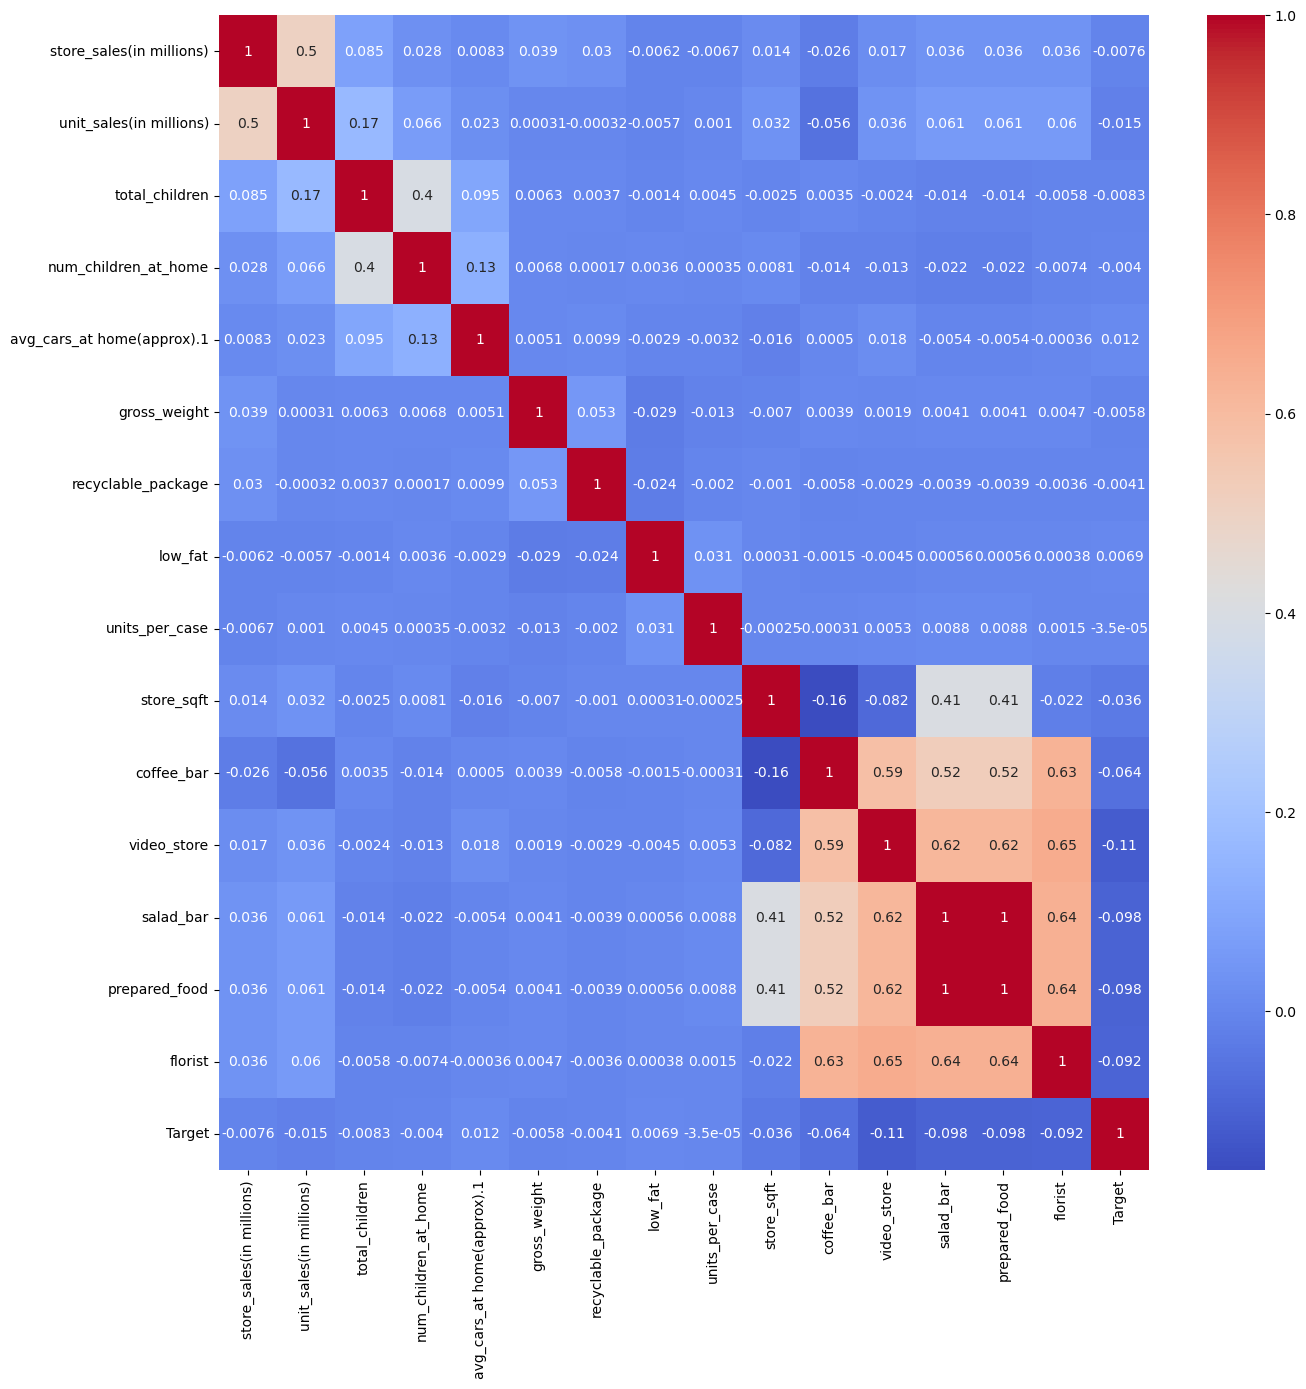

In [9]:
korrelasjonsmatrise(X_train,y_train)

**Svar:**

*< avg_cars_at home er den høyeste (0.012) men det er ganske lav  >*

<span style='color:red '> Fin matrise, men det ser ut til at video_store er høyere med -0.11 (husk at negativ korrelasjon også er korrelasjon)</span>

#### Oppgave 1.3) 
Velg en modellarkitektur (gjerne fra Scikit-Learn) og gjør et strukturert hyperparametersøk. 
* Gjør et søk på minst 3 paramtere og minst 2 verdier pr parameter
* Bruk 3-folds kryssvalidering for hver parameterkombinasjon
* Velg en metrikk som passer for målet (tips: "neg_mean_squared_error" i sklearn) 
* Skriv ut den parameterkobinasjonen som ga den beste skåren, samt skåren. Kommenter resultatet

In [11]:
#TODO: Utfør hyperparametersøk for en modell


In [12]:
# Denne delen hentet fra ChatGPT 12.nov.2023
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)



# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

# Create the Random Forest Regressor
rf = RandomForestRegressor()

# Create GridSearchCV with 3-fold cross-validation and neg_mean_squared_error as the scoring metric
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X, y)

# Print the best parameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score (neg_mean_squared_error): ", -grid_search.best_score_)


Best Parameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (neg_mean_squared_error):  849.4687246881361


**Svar:**

*< 
Best Parameters:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Score (neg_mean_squared_error):  849.4232948476723 >*

<span style='color:red '> Fin fremgangsmåte. Savner en diskusjon/kommentarer til resultatet ditt </span>

#### Oppgave 1.4) 
Bruk hyperparameterkombinasjonen fra oppgave 1.3 og kryssvalider den modellen på nytt med K >= 5 
* Logg "mean absolute error" og "mean squared error" for hver kryssvalideringsrunde
* Oppgi gjennomsnitt og standardavvik for "mean absolute error" og "mean squared error" etter kryssvalideringen og kommenter resultatet
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i treningsdataene? 

In [15]:
# Fra forelesning 2- 06 K-fold og sammenligning av modeller

In [16]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

In [17]:
rf = RandomForestRegressor(**grid_search.best_params_)

In [18]:
#TODO: Utfør kryssvalidering med de optimale parameterene fra forrige oppgave og logg mean_absolute_error og mean_squared_error

In [19]:
#TODO: Beregn gjennomsnitt og standard avvik for mean_absolute_error og mean_squared_error og beregn hvor stor den 
# gjennomsnittlige feilen er i forhold til den gjennomsnittlige prisen for markedskampanjen (target) i prosent

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [21]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [22]:
mae = []
mse = []
for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    #print(f"Fold {i+1}:")
    
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
    
    rf = RandomForestRegressor(**grid_search.best_params_)
    rf.fit(X_train_cv, y_train_cv)
    
    y_val_hat = rf.predict(X_val_cv)
    score = mean_absolute_error(y_val_cv, y_val_hat)
    score1 = mean_squared_error(y_val_cv, y_val_hat)
    #print("F1-score = ",score)
    mae.append(score)
    mse.append(score1)
#logreg = LogisticRegression(solver='lbfgs',max_iter=5000)
#logreg.fit(X_train, y_train)
#y_test_hat = logreg.predict_proba(X_test)[:,1]
#logreg_test_score = f1_score(y_test,(y_test_hat>0.5)*1,average='binary').round(3)

In [40]:
#mae

In [17]:
np.asarray(mae).mean()


25.089930042632382

In [13]:
mse

[852.1387158128299,
 852.5811394691656,
 860.3808030252341,
 842.0794063394328,
 839.6280819203162]

In [18]:
np.asarray(mae).std()


0.1919692914251246

In [19]:
np.asarray(mse).mean()

849.3616293133957

In [20]:
np.asarray(mse).std()

7.579872830805976

**Svar:**

*< gjennomsnitt er 25.1 og standardavvik er 0.19 for "mean absolute error" 
og gjennomsnitt er 849.36 og standardavvik er 7.58 for"mean squared error"  >*

<span style='color:red '> Fin fremgangsmåte. Savner en diskusjon/kommentarer til resultatet ditt </span>

#### Oppgave 1.5) 
Tren modellen en siste gang på alle treningsdataene og gjør prediksjon på testdataene (bruk de optimale parametrene fra oppgave 1.3)
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i testdataene? 

In [23]:
#TODO: Tren modellen på alle treningsdata og utfør prediksjon på testdataene

In [24]:
 rf = RandomForestRegressor(**grid_search.best_params_)

In [25]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

In [26]:
y_test_hat = rf.predict(X_test)

In [27]:
score = mean_absolute_error(y_test, y_test_hat)
score1 = mean_squared_error(y_test, y_test_hat)

In [28]:
# mean_absolute_error for training
score

25.121237571130656

In [29]:
score1

849.0156158143421

In [30]:
# Mean from data
y_test.mean()

99.30020325519884

**Svar:**

*< Feilen er 25%. Det er ganske stor feil. >*

<span style='color:red '> Fin fremgangsmåte. Savner en litt lengere diskusjon omkring resultatet ditt </span>